## Import packages

In [1]:
import pandas as pd
import numpy as np

## Load iris dataset

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.1,  random_state=0)

## T-SNE

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [4]:
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(X_train)
print(X_reduced.shape)

(135, 2)


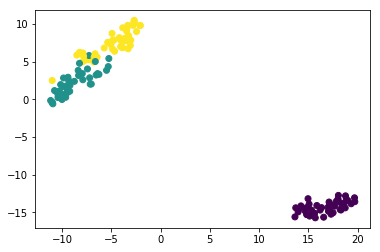

In [5]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train)

## Modeling (Cross Validation)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

learning_rate = [0.05, 0.1, 0.02]
max_depth = [2, 3, 4]
min_samples_leaf =  [5, 9, 17]
max_features = [1.0, 0.3, 0.1]

hyperparams = {'learning_rate': learning_rate, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'max_features': max_features}
gd = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=30), param_grid = hyperparams, verbose=True, cv=10, scoring = "accuracy", n_jobs=10)
gd.fit(X_train, y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   10.5s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   18.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   28.4s
[Parallel(n_jobs=10)]: Done 810 out of 810 | elapsed:   29.4s finished


0.9703703703703703
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=0.1, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=17, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


## Apply to test dataset

In [7]:
from sklearn.metrics import confusion_matrix
clf = gd.best_estimator_
clf.fit(X_train, y_train)
confusion_matrix(y_test, clf.predict(X_test))

array([[3, 0, 0],
       [0, 8, 0],
       [0, 0, 4]], dtype=int64)

## Plot feature importance

In [8]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

In [9]:
label = iris_dataset.feature_names

<Container object of 4 artists>

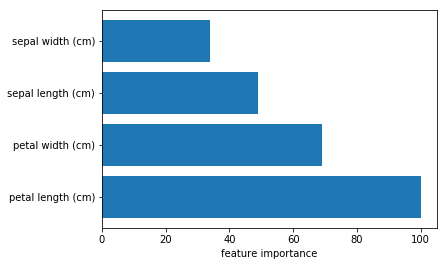

In [10]:
plt.xlabel('feature importance')
plt.barh(label,feature_importance, tick_label=label, align="center")